# **EPIC 2 - DATA UNDERSTANDING**

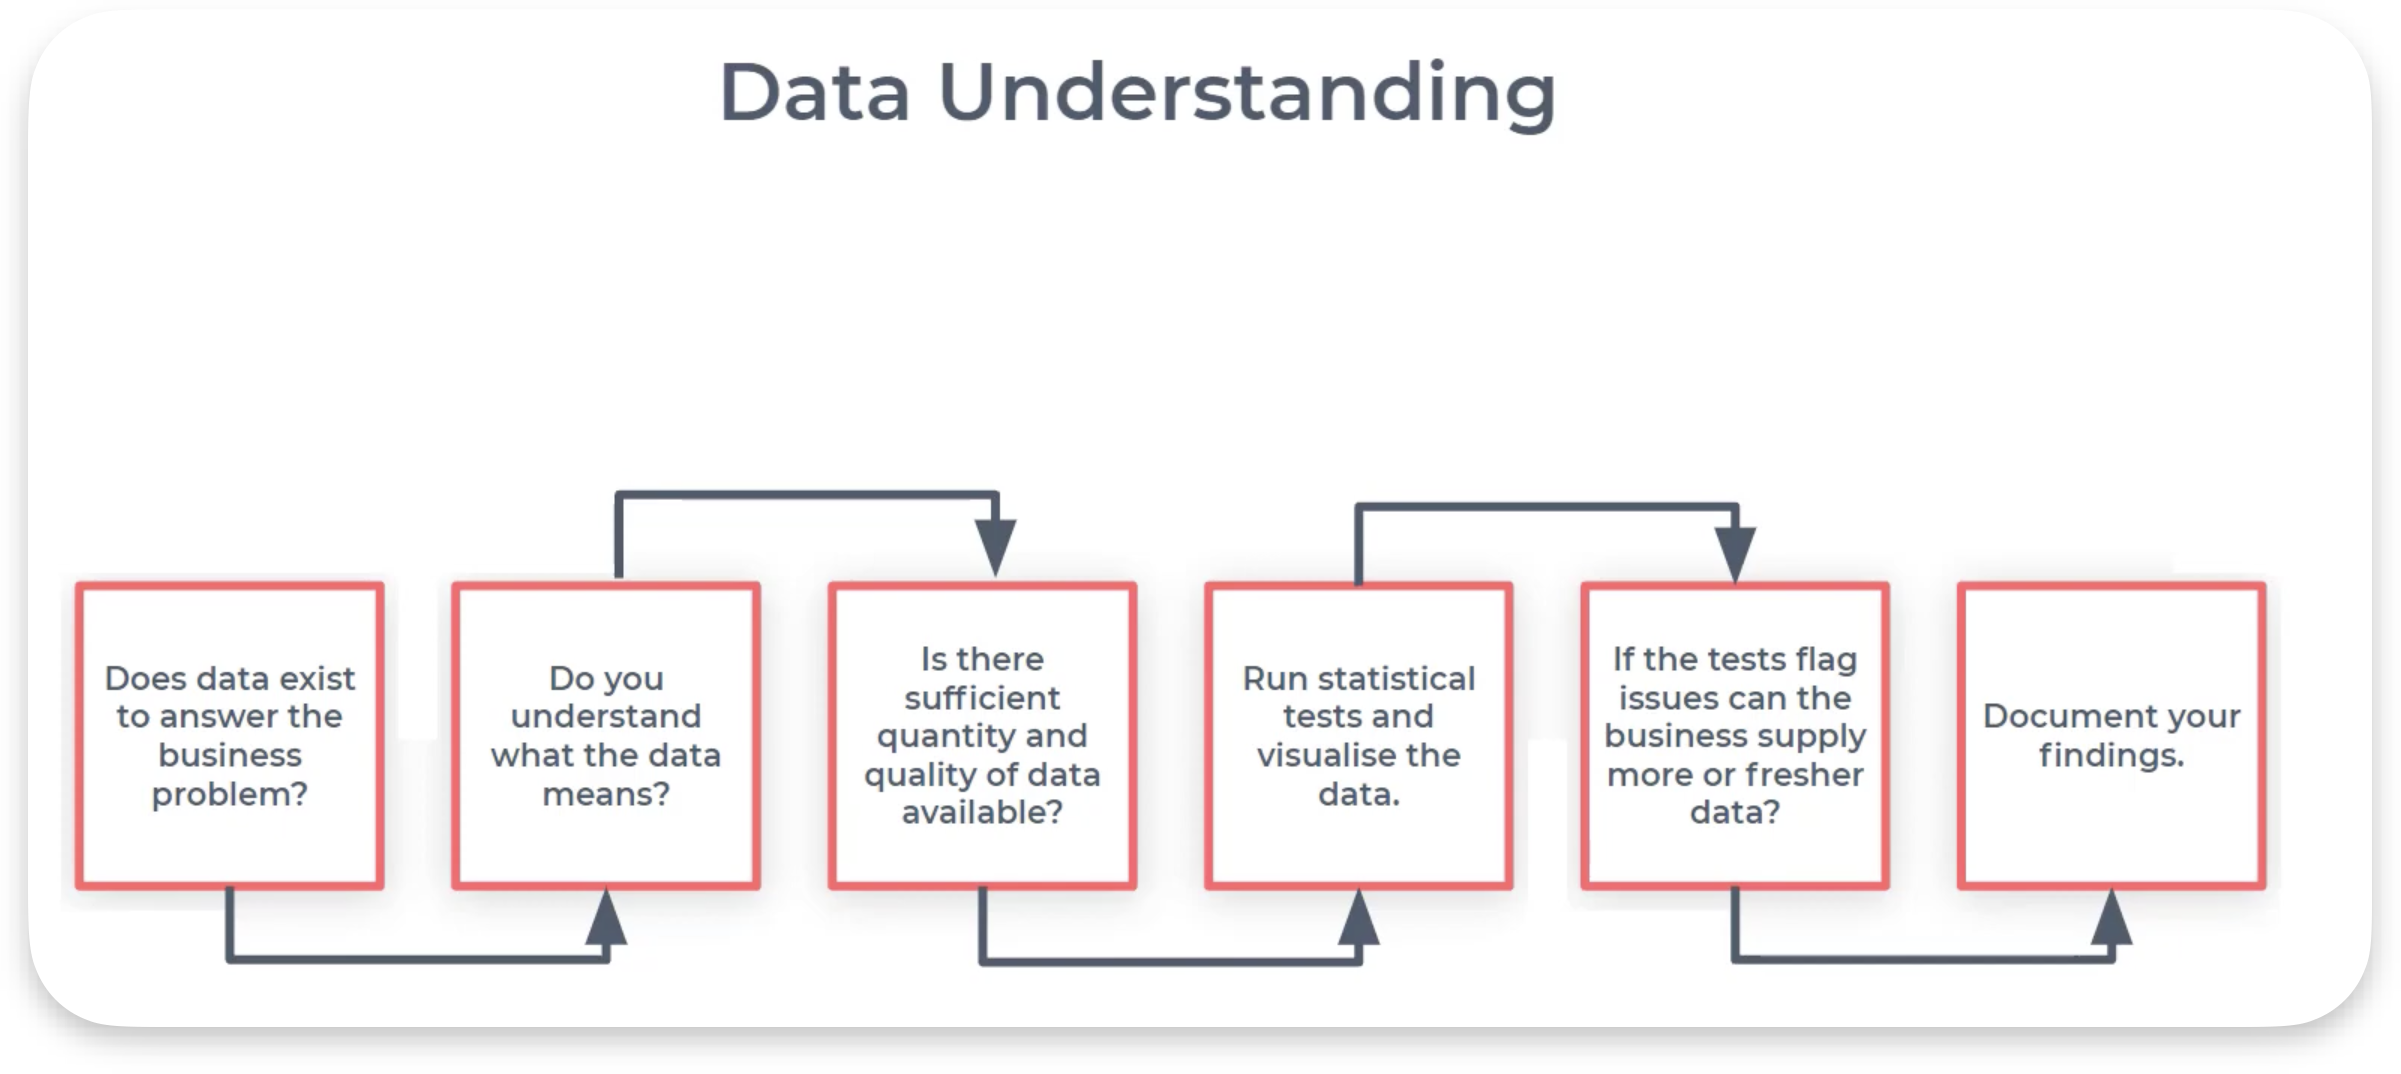

## Objectives

- Collect the dataset of animal images from Kaggle and rectify any deficiencies in the dataset before moving on to epic 3: data preparation.

### Acceptance Criteria
- The dataset should contain images of various species and breeds of animals, as agreed with the client.
- The images should be of sufficient quality and quantity to train the model.

## Tasks
- Download the dataset from Kaggle.
- Explore the dataset to understand its structure and contents.
- Run statistical tests and visualise the dataset.

## Inputs

- Kaggle dataset of animal images.
- Kaggle JSON file for authentication. 

## Outputs

- An image dataset containing sufficient quality and quantity: inputs/datasets.

---

# Change working directory

In [6]:
import os
current_dir = os.getcwd()
print("Current working directory is:", current_dir)

Current working directory is: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


In [3]:
os.chdir(os.path.dirname(current_dir)) # Change the current working directory to the parent directory
current_dir = os.getcwd() # Get the new current working directory
print("Changing the working directory to parent folder:", current_dir)

Changing the working directory to parent folder: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


#  Collect dataset

First, install kaggle

In [3]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 910.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.4 MB/s eta 0:00:00
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
  Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  DEPRECATION: kaggle is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for kaggle ... done

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Change kaggle configuration directory to current working directory and permission of authentication file.

In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd() # set environment variable
! chmod 600 kaggle.json # make sure the kaggle.json file is not public

Set kaggle dataset and download the dataset.

In [8]:
KaggleDatasetPath = "rafsunahmad/choose-your-pet"
DestinationFolder = "datasets/pet_data"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/rafsunahmad/choose-your-pet
License(s): other
100%|██████████████████████████████████████| 1.02G/1.02G [06:38<00:00, 2.94MB/s]
100%|██████████████████████████████████████| 1.02G/1.02G [06:38<00:00, 2.75MB/s]


Unzip downloaded dataset:

In [9]:
! unzip {DestinationFolder}/choose-your-pet.zip -d {DestinationFolder} \
    && rm {DestinationFolder}/choose-your-pet.zip

Archive:  datasets/pet_data/choose-your-pet.zip
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_1.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_10.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_11.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_12.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_13.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_14.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_15.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_16.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_17.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_18.jpg  
  inflating: datasets/pet_data/Choose pet datset for kaggle/Abyssinian/Image_19.jpg  
  infla

# Initial data exploration

The dataset was reviewed with the client to identify if there were any missing animals. The following dog breeds were identified:

- Springer spaniel
- Border collie
- Jack russell terrier
- Pugs.

The client was satisfied that the dataset was not deficient in any other animal that was commonly seen during consults.

In addition, the dataset was visually 'sense-checked' for duplicates and any other anomalies. The following were identified:
- A number of images were duplicated.
- Some images were incorrectly labelled.

Due to the number of duplicates and incorrectly labelled images, the dataset was cleaned to remove these images. The following code uses the [filecmp module](https://docs.python.org/3/library/filecmp.html).

In [8]:
import os
import filecmp

def find_duplicates(directory):
    files = []
    for dirpath, dirnames, filenames in os.walk(directory):
        files.extend([os.path.join(dirpath, f) for f in filenames])
    duplicates = []
    while len(files):
        current_file = files.pop()
        for file in files:
            if filecmp.cmp(current_file, file):
                duplicates.append((current_file, file))
    return duplicates

duplicates = find_duplicates('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')
print(f"Number of duplicate pairs: {len(duplicates)}")
for pair in duplicates:
    print(f"Duplicates: {os.path.join(os.path.basename(os.path.dirname(pair[0])), os.path.basename(pair[0]))} and {os.path.join(os.path.basename(os.path.dirname(pair[1])), os.path.basename(pair[1]))}")

Number of duplicate pairs: 136
Duplicates: Bulldog/.DS_Store and Sphynx/.DS_Store
Duplicates: Bulldog/.DS_Store and Burmese/.DS_Store
Duplicates: Bulldog/.DS_Store and Chinchilla/.DS_Store
Duplicates: Bulldog/.DS_Store and Guinea Pig/.DS_Store
Duplicates: Bulldog/.DS_Store and French Bulldog/.DS_Store
Duplicates: Bulldog/.DS_Store and Ragdoll/.DS_Store
Duplicates: Bulldog/.DS_Store and Maine Coon/.DS_Store
Duplicates: Bulldog/.DS_Store and Scottish Fold/.DS_Store
Duplicates: Bulldog/.DS_Store and Rat/.DS_Store
Duplicates: Bulldog/.DS_Store and Cocker Spaniel/.DS_Store
Duplicates: Bulldog/.DS_Store and Cockatiel/.DS_Store
Duplicates: Bulldog/.DS_Store and Persian/.DS_Store
Duplicates: Bulldog/.DS_Store and Salamander/.DS_Store
Duplicates: Bulldog/.DS_Store and Hedgehog/.DS_Store
Duplicates: Bulldog/.DS_Store and Horned Toad/.DS_Store
Duplicates: Bulldog/.DS_Store and Golden Retriever/.DS_Store
Duplicates: Golden Retriever/.DS_Store and Sphynx/.DS_Store
Duplicates: Golden Retriever/.DS_S

Due to the relatively small number of duplicates, these were visually reviewed and manually removed from the dataset.

In [9]:
import os
import filecmp

def find_duplicates(directory):
    files = []
    for dirpath, dirnames, filenames in os.walk(directory):
        files.extend([os.path.join(dirpath, f) for f in filenames if f != '.DS_Store'])
    duplicates = []
    while len(files):
        current_file = files.pop()
        for file in files:
            if filecmp.cmp(current_file, file):
                duplicates.append((current_file, file))
    return duplicates

duplicates = find_duplicates('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')
print(f"Number of duplicate pairs: {len(duplicates)}")
for pair in duplicates:
    print(f"Duplicate images: {os.path.join(os.path.basename(os.path.dirname(pair[0])), os.path.basename(pair[0]))} and {os.path.join(os.path.basename(os.path.dirname(pair[1])), os.path.basename(pair[1]))}")

Number of duplicate pairs: 0


The dataset was visually reviewed to identify any images that were incorrectly labelled or outside the scope of the project, such as wild animals. In total, 124 images were removed from the dataset.

---

# Visualize the dataset

## Dataset quantity per animal

First, the dataset was visualized to understand the distribution of images across the different animal breeds. The following code uses the [matplotlib library](https://matplotlib.org/).

In [27]:
!pip install matplotlib pillow seaborn pandas

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


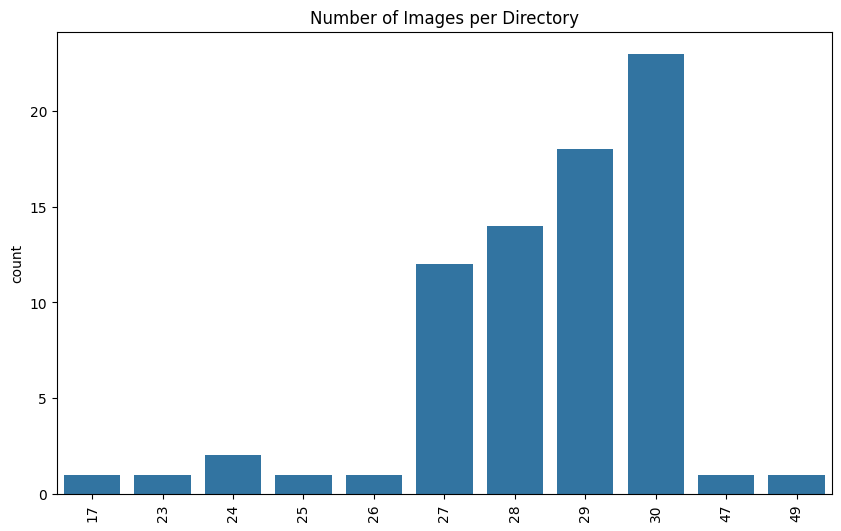

In [10]:
import os
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

def visualize_dataset(directory):
    dir_counts = {}
    image_sizes = []
    image_resolutions = []
    for dirpath, dirnames, filenames in os.walk(directory):
        count = 0
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                count += 1
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_sizes.append(width * height)
                    image_resolutions.append((width, height))
        if count > 0:
            dir_counts[dirpath] = count

    # Plot number of images per directory
    plt.figure(figsize=(10, 6))
    sns.countplot(x=list(dir_counts.values()))
    plt.title('Number of Images per Directory')
    plt.xticks(rotation=90)
    plt.show()

visualize_dataset('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

Min = 17 images (Bengal).

Max = 49 images (Labrador Retriever).

Mode = 30 images.

In [36]:
def print_directories_in_range(directory, min_count, max_count):
    dir_counts = {}
    for dirpath, dirnames, filenames in os.walk(directory):
        count = 0
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                count += 1
        if count > 0:
            dir_counts[dirpath] = count

    # Print directories with image count within the specified range
    for dirpath, count in dir_counts.items():
        if min_count <= count <= max_count:
            print(f"Directory {dirpath} has {count} images")

print_directories_in_range('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset', 17, 26)
print_directories_in_range('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset', 47, 49)


Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Sphynx has 26 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Burmese has 24 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Springer Spaniel has 23 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Prairie Dog has 25 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Bengal has 17 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Persian has 24 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Labrador Retriever has 49 images
Directory /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Golden Retriever has 47 images


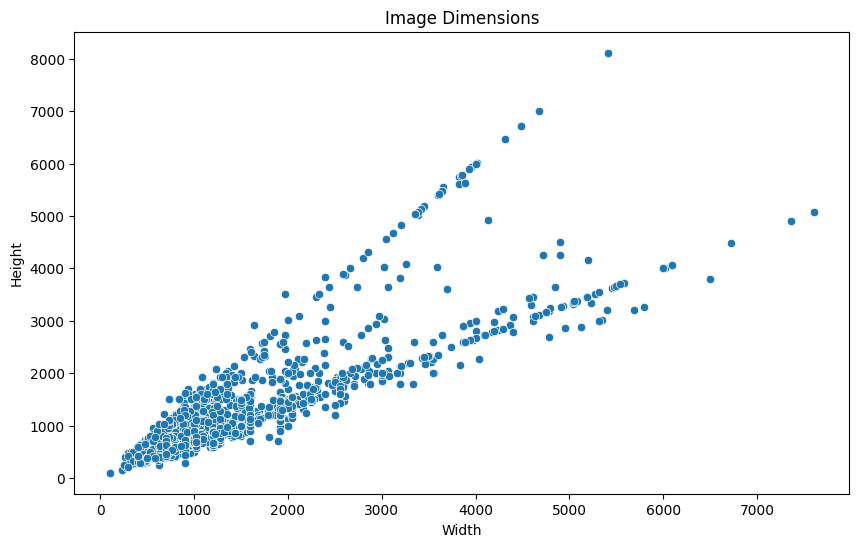

In [5]:
import pandas as pd

def visualize_image_resolutions(directory):
    image_resolutions = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_resolutions.append((width, height))

    # Convert to DataFrame for easier plotting
    df = pd.DataFrame(image_resolutions, columns=['Width', 'Height'])

    # Plot image dimensions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Width', y='Height', data=df)
    plt.title('Image Dimensions')
    plt.show()

visualize_image_resolutions('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

The minimum resolution is 100 x 100 and is found in the image /Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/Great Dane/Image_17.jpg


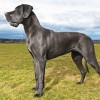

In [47]:
import os
from PIL import Image
from IPython.display import display

def print_min_resolution(directory):
    min_resolution = None
    min_dimensions = None
    min_file = None
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(dirpath, filename)
                with Image.open(file_path) as img:
                    width, height = img.size
                    resolution = width * height
                    if min_resolution is None or resolution < min_resolution:
                        min_resolution = resolution
                        min_dimensions = (width, height)
                        min_file = file_path

    print(f"The minimum resolution is {min_dimensions[0]} x {min_dimensions[1]} and is found in the image {min_file}")

    # Display the image with the minimum resolution
    with Image.open(min_file) as img:
        display(img)

print_min_resolution('/Users/gingermale/Documents/repos/PP5/pet-image-classifier/inputs/dataset')

# Conclusions and Next Steps

**Quality**

The image with the lowest resolution (100x100 pixels) is still visually recognisable as a Great Dane so the dataset is deemed to have sufficient quality to train the model. Before training the model, the images will be resized to 150x150 pixels to improve the model's performance.

**Quantity**

The above findings show unequal numbers of images per animal. The data preparation step will seek to resolve this in two ways:

1. manual imputing of animals highlighted above with fewer than 30 images.

2. Manual removal of Golden Retriever and Labrador Retriever to reduce numbers to around 30 images.

Later, during the modelling step, data augmentation will be used to increase the number of images for each animal up to 50 before training the model.

The next step is to prepare the dataset for training the model in epic 3: data preparation.